# HomeWork 6
**DeadLine : 23:59 4 Ordibehesht 1400**

**Total points : 100pts**

Import some prerequisites:

In [92]:
import os
import cv2
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

## Downloading data


In [93]:
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip

--2021-04-24 21:57:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 173.194.198.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   241MB/s    in 0.3s    

2021-04-24 21:57:27 (241 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [94]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
  
BASE_PATH = '/tmp/cats_and_dogs_filtered'
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'train')
DATA_TEST_PATH = os.path.join(BASE_PATH, 'validation')

## set hyperparameters
please define and set hyperparameters.

In [95]:
IMG_WIDTH=None
IMG_HEIGHT = None
EPOCHS = 15
BATCH_SIZE= 20
n_classes = None

## An example from dataset

(374, 500, 3)


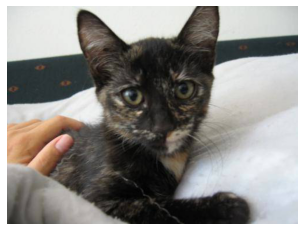

In [96]:
image = mpimg.imread(os.path.join(DATA_TRAIN_PATH, 'cats/cat.109.jpg'))
print(image.shape)
plt.imshow(image)
plt.axis('off')
plt.show()

## create generator

In this step, we will use the Keras `ImageDataGenerator` methods for loading and transform the images of the dataset. With these methods, we don't need to load the entire image dataset in memory.

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen =  ImageDataGenerator(rescale=1./255)
train_datagen_aug =  ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen =  ImageDataGenerator(rescale=1./255)

train_generator  = train_datagen.flow_from_directory(
    DATA_TRAIN_PATH,        # Target directory
    target_size=(150, 150), # Resizes all images to 150 × 150
    batch_size=20,
    class_mode='binary')
train_generator_aug  = train_datagen_aug.flow_from_directory(
    DATA_TRAIN_PATH,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
test_generator  = test_datagen.flow_from_directory(
    DATA_TEST_PATH,         # Target directory
    target_size=(150, 150), # Resizes all images to 150 × 150
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Part A: build and train model without using data augmentation

In [98]:
from tensorflow.keras import layers
from tensorflow.keras import models

def build_model():
  model = models.Sequential()
  model.add(layers.Input(shape=(150, 150, 3)))

  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  return model

In [99]:
model = build_model()
loss = 'binary_crossentropy'
optimizer = 'adam'
model.compile(loss= loss, optimizer= optimizer, metrics=['acc'])
history = model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/15
100/100 [==============================] - 100s 993ms/step - loss: 0.8377 - acc: 0.5128
Epoch 2/15
100/100 [==============================] - 99s 988ms/step - loss: 0.6867 - acc: 0.5331
Epoch 3/15
100/100 [==============================] - 99s 992ms/step - loss: 0.6718 - acc: 0.5797
Epoch 4/15
100/100 [==============================] - 99s 987ms/step - loss: 0.6370 - acc: 0.6257
Epoch 5/15
100/100 [==============================] - 99s 991ms/step - loss: 0.5483 - acc: 0.7034
Epoch 6/15
100/100 [==============================] - 99s 991ms/step - loss: 0.4554 - acc: 0.7880
Epoch 7/15
100/100 [==============================] - 99s 986ms/step - loss: 0.3008 - acc: 0.8799
Epoch 8/15
100/100 [==============================] - 99s 988ms/step - loss: 0.1249 - acc: 0.9540
Epoch 9/15
100/100 [==============================] - 99s 993ms/step - loss: 0.0307 - acc: 0.9934
Epoch 10/15
100/100 [==============================] - 100s 1s/step - loss: 0.0321 - acc: 0.9879
Epoch 11/15
100/100 

50/50 [==============================] - 15s 292ms/step - loss: 2.5361 - acc: 0.6710


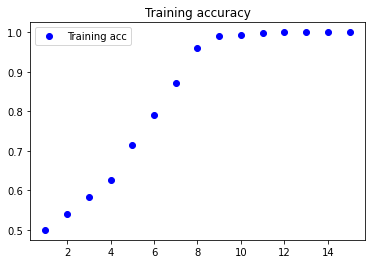

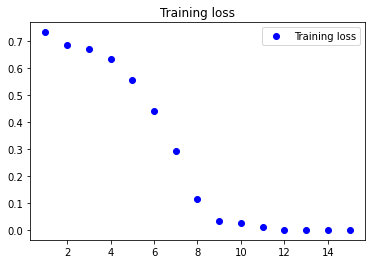

In [108]:
import matplotlib.pyplot as plt

def plot_history(history):
  acc = history.history['acc']
  #val_acc = history.history['vacc']
  loss = history.history['loss']
  #val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  #plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  #plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training loss')
  plt.legend()

  plt.show()

model.evaluate(test_generator, batch_size=BATCH_SIZE)
plot_history(history)

## Part B: train model using data augmentation

In [109]:
model = build_model()
loss = 'binary_crossentropy'
optimizer = 'adam'
model.compile(loss= loss, optimizer= optimizer,  metrics=['acc'])
history = model.fit(train_generator_aug, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/15
100/100 [==============================] - 108s 1s/step - loss: 0.9344 - acc: 0.4770
Epoch 2/15
100/100 [==============================] - 107s 1s/step - loss: 0.6932 - acc: 0.4991
Epoch 3/15
100/100 [==============================] - 106s 1s/step - loss: 0.6932 - acc: 0.5352
Epoch 4/15
100/100 [==============================] - 105s 1s/step - loss: 0.6939 - acc: 0.4731
Epoch 5/15
100/100 [==============================] - 106s 1s/step - loss: 0.6934 - acc: 0.4947
Epoch 6/15
100/100 [==============================] - 108s 1s/step - loss: 0.6901 - acc: 0.5581
Epoch 7/15
100/100 [==============================] - 108s 1s/step - loss: 0.6828 - acc: 0.5623
Epoch 8/15
100/100 [==============================] - 107s 1s/step - loss: 0.6618 - acc: 0.6148
Epoch 9/15
100/100 [==============================] - 106s 1s/step - loss: 0.6592 - acc: 0.6112
Epoch 10/15
100/100 [==============================] - 106s 1s/step - loss: 0.6712 - acc: 0.5777
Epoch 11/15
100/100 [==================

50/50 [==============================] - 15s 292ms/step - loss: 0.6310 - acc: 0.6580


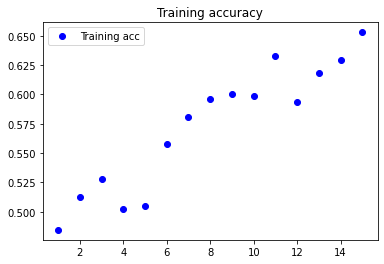

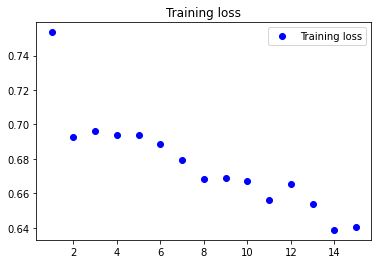

In [110]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)
plot_history(history)

## Part C: build and train model with dropout

In [112]:
def build_model():
  model = models.Sequential()
  model.add(layers.Input(shape=(150, 150, 3)))

  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  return model

In [113]:
model = build_model()
loss = 'binary_crossentropy'
optimizer = 'adam'
model.compile(loss= loss, optimizer= optimizer, metrics=['acc'])
history = model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/15
100/100 [==============================] - 101s 997ms/step - loss: 0.8300 - acc: 0.4727
Epoch 2/15
100/100 [==============================] - 102s 1s/step - loss: 0.6765 - acc: 0.5388
Epoch 3/15
100/100 [==============================] - 102s 1s/step - loss: 0.6082 - acc: 0.6621
Epoch 4/15
100/100 [==============================] - 101s 1s/step - loss: 0.5514 - acc: 0.7126
Epoch 5/15
100/100 [==============================] - 101s 1s/step - loss: 0.4994 - acc: 0.7482
Epoch 6/15
100/100 [==============================] - 100s 1s/step - loss: 0.3979 - acc: 0.8166
Epoch 7/15
100/100 [==============================] - 100s 997ms/step - loss: 0.3444 - acc: 0.8509
Epoch 8/15
100/100 [==============================] - 100s 1000ms/step - loss: 0.2816 - acc: 0.8834
Epoch 9/15
100/100 [==============================] - 98s 983ms/step - loss: 0.2151 - acc: 0.9189
Epoch 10/15
100/100 [==============================] - 100s 1s/step - loss: 0.1527 - acc: 0.9357
Epoch 11/15
100/100 [======

50/50 [==============================] - 15s 290ms/step - loss: 1.0732 - acc: 0.6970


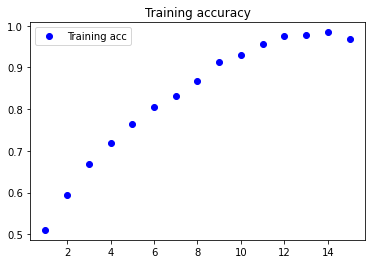

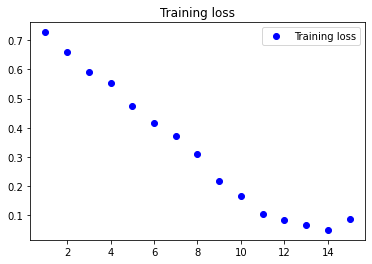

In [114]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)
plot_history(history)